# Data Preprocessing Methods

Missing values > Outliers > Normalization/Scaling > Encoding > Feature Extraction > Data Splitting

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Missing Values
Titanic is known dataset with missing values

In [ ]:
titanic = sns.load_dataset('titanic')

In [ ]:
titanic.isnull().sum().to_frame(name='missing_count') \
       .join(titanic.dtypes.to_frame(name='dtype'))

,missing_count,dtype
survived,0,int64
pclass,0,int64
sex,0,object
age,177,float64
sibsp,0,int64
parch,0,int64
fare,0,float64
embarked,2,object
class,0,category
who,0,object


In [ ]:
from sklearn.impute import SimpleImputer

### Mean Imputation

In [ ]:
mean_imputer = SimpleImputer(strategy="mean")
titanic["age"] = mean_imputer.fit_transform(titanic[["age"]])

### Median Imputation

In [ ]:
# median_imputer = SimpleImputer(strategy="median")
# titanic["age"] = median_imputer.fit_transform(titanic[["age"]])

### Mode Imputation

In [ ]:
# For Obj/category
mode_imputer = SimpleImputer(strategy="most_frequent")

titanic["deck"] = mode_imputer.fit_transform(titanic[["deck"]])[:, 0]
titanic["embark_town"] = mode_imputer.fit_transform(titanic[["embark_town"]])[:, 0]
titanic["embarked"] = mode_imputer.fit_transform(titanic[["embarked"]])[:, 0]

### KNN Imputation
For numeric only, unless ordinal encoding of categories

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
knn_imputer = KNNImputer(n_neighbors=5)
titanic_age_knn = titanic.copy()
titanic_age_knn[["age"]] = knn_imputer.fit_transform(titanic[["age"]])

### Result

In [ ]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


# 2. Outliers

## Inquartile Method



In [ ]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
iris_df = iris.frame

In [ ]:
Q1 = iris_df["sepal width (cm)"].quantile(0.25)
Q3 = iris_df["sepal width (cm)"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

iris_o = iris_df[
    (iris_df["sepal width (cm)"] >= lower) &
    (iris_df["sepal width (cm)"] <= upper)
]

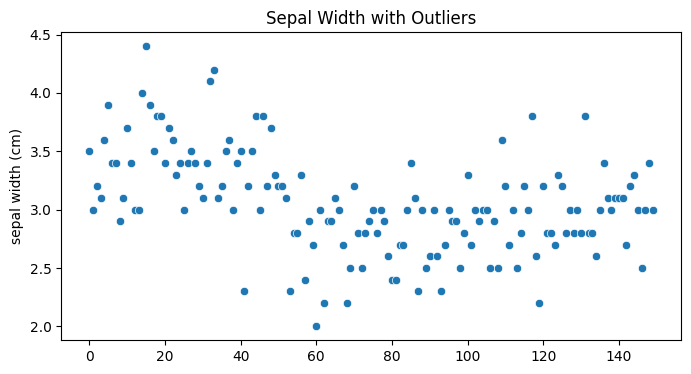

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=range(len(iris_df)), y=iris_df["sepal width (cm)"])
plt.title("Sepal Width with Outliers")
plt.show()

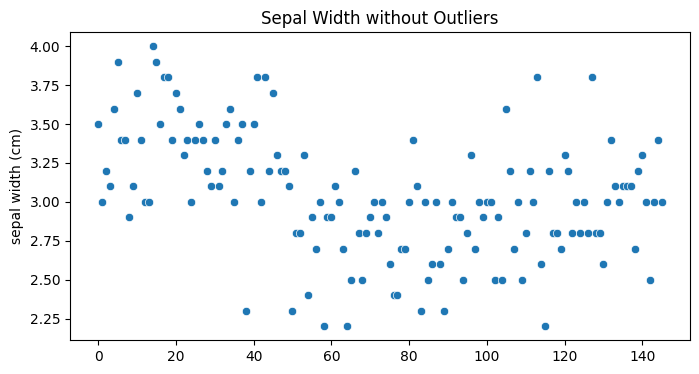

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=range(len(iris_o)), y=iris_o["sepal width (cm)"])
plt.title("Sepal Width without Outliers")
plt.show()

## Z-Score Method
Based on how far point is from mean, in terms of standard deviation

In [ ]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

zscore function from scipy

In [ ]:
from scipy.stats import zscore
iris_df["sepal_width_z"] = zscore(iris_df["sepal width (cm)"])
#z=2
iris_z = iris_df[iris_df["sepal_width_z"].abs() <= 2]

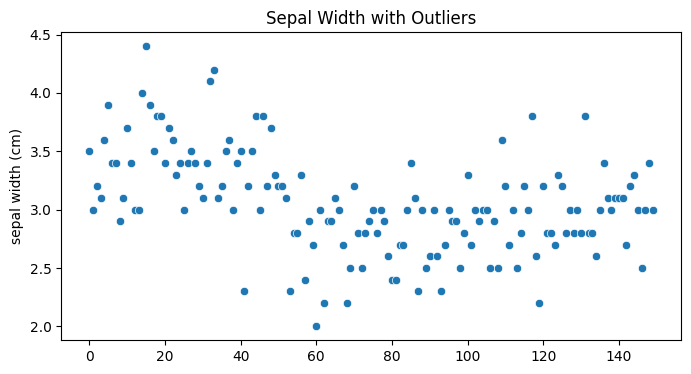

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=range(len(iris_df)), y=iris_df["sepal width (cm)"])
plt.title("Sepal Width with Outliers")
plt.show()

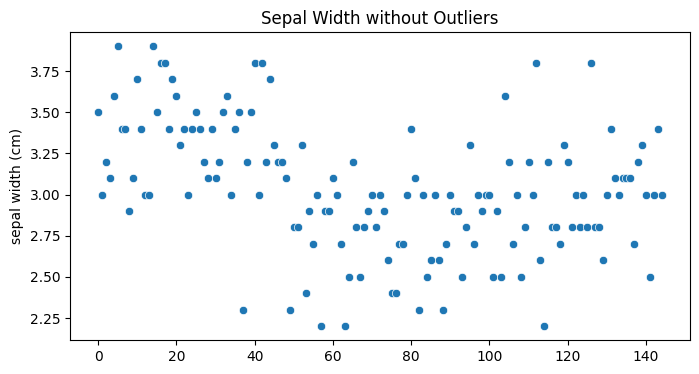

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=range(len(iris_z)), y=iris_z["sepal width (cm)"])
plt.title("Sepal Width without Outliers")
plt.show()

## Winsorization
Based on percentile

In [ ]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [ ]:
lower = iris_df["sepal width (cm)"].quantile(0.05)
upper = iris_df["sepal width (cm)"].quantile(0.95)

iris_df["sepal_width_winsor"] = iris_df["sepal width (cm)"].clip(lower, upper)

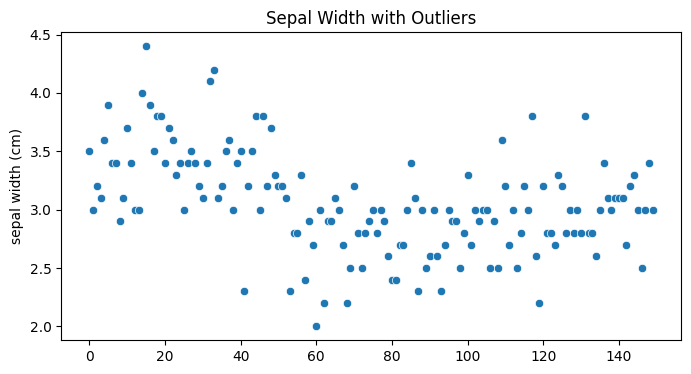

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=range(len(iris_df)), y=iris_df["sepal width (cm)"])
plt.title("Sepal Width with Outliers")
plt.show()

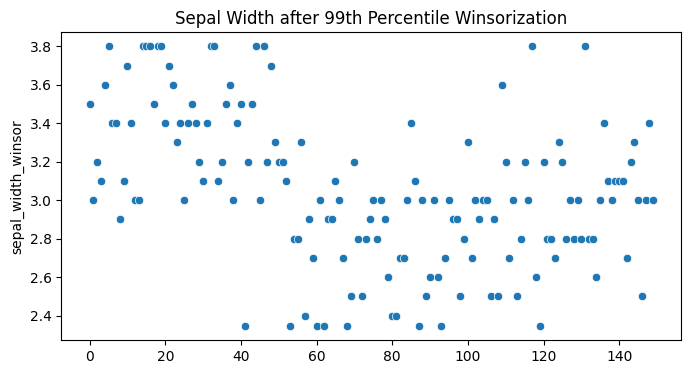

In [ ]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=range(len(iris_df)), y=iris_df["sepal_width_winsor"])
plt.title("Sepal Width after 99th Percentile Winsorization")
plt.show()

# 3. Encoding